In [6]:
%load_ext autoreload

In [1]:
import torch
import torchvision

In [2]:
print(f'torch version: {torch.__version__}')
print(f'torchvision version: {torchvision.__version__}')

torch version: 1.9.0
torchvision version: 0.10.0


In [29]:
import os
import time
import wandb
import IPython.display

In [5]:
wandb.login()

True

In [7]:
from train_utils import make_model, run_one_epoch, train_model, run

In [8]:
data_root = os.path.expanduser('~/ml_datasets/')
path_to_dataset = os.path.join(data_root, 'cifar10')

In [31]:
config_dict = {
    'batch_size': 256,
    'num_epochs': 40,
    'learning_rate': 0.003,
    'base_lr': 0.001,
    'max_lr': 0.09,
    'num_classes': 10,
    'img_size': 32,
    'patch_size': 4,
    'in_channels': 3,
    'embed_dim': 256,
    'pos_drop_rate': 0.15,
    'num_blocks': 3,
    'num_heads': 8,
    'qkv_bias': False,
    'attn_drop_rate': 0.15,
    'proj_drop_rate': 0.15,
    'mlp_ratio': 3,
    'mlp_drop_rate': 0.15,
}

In [32]:
transform = torchvision.transforms.Compose(
    [torchvision.transforms.ToTensor()]
)

batch_size = config_dict['batch_size']

# data for training
train_dataset = torchvision.datasets.CIFAR10(
    path_to_dataset,
    transform=transform,
    download=True,    
    train=True,
)

train_dataloader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=batch_size,
    shuffle=True
)

# data for testing
test_dataset = torchvision.datasets.CIFAR10(
    path_to_dataset,
    transform=transform,
    download=True,    
    train=False,    
)

test_dataloader = torch.utils.data.DataLoader(
    test_dataset,
    batch_size=batch_size,
    shuffle=False
)

Files already downloaded and verified
Files already downloaded and verified


In [12]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 
           'dog', 'frog', 'horse', 'ship', 'truck')

In [13]:
images, labels = next(iter(train_dataloader))

In [14]:
type(images), images.shape, type(labels), labels.shape

(torch.Tensor, torch.Size([32, 3, 32, 32]), torch.Tensor, torch.Size([32]))

In [ ]:
run(train_dataloader, test_dataloader, config_dict, './model.pt')

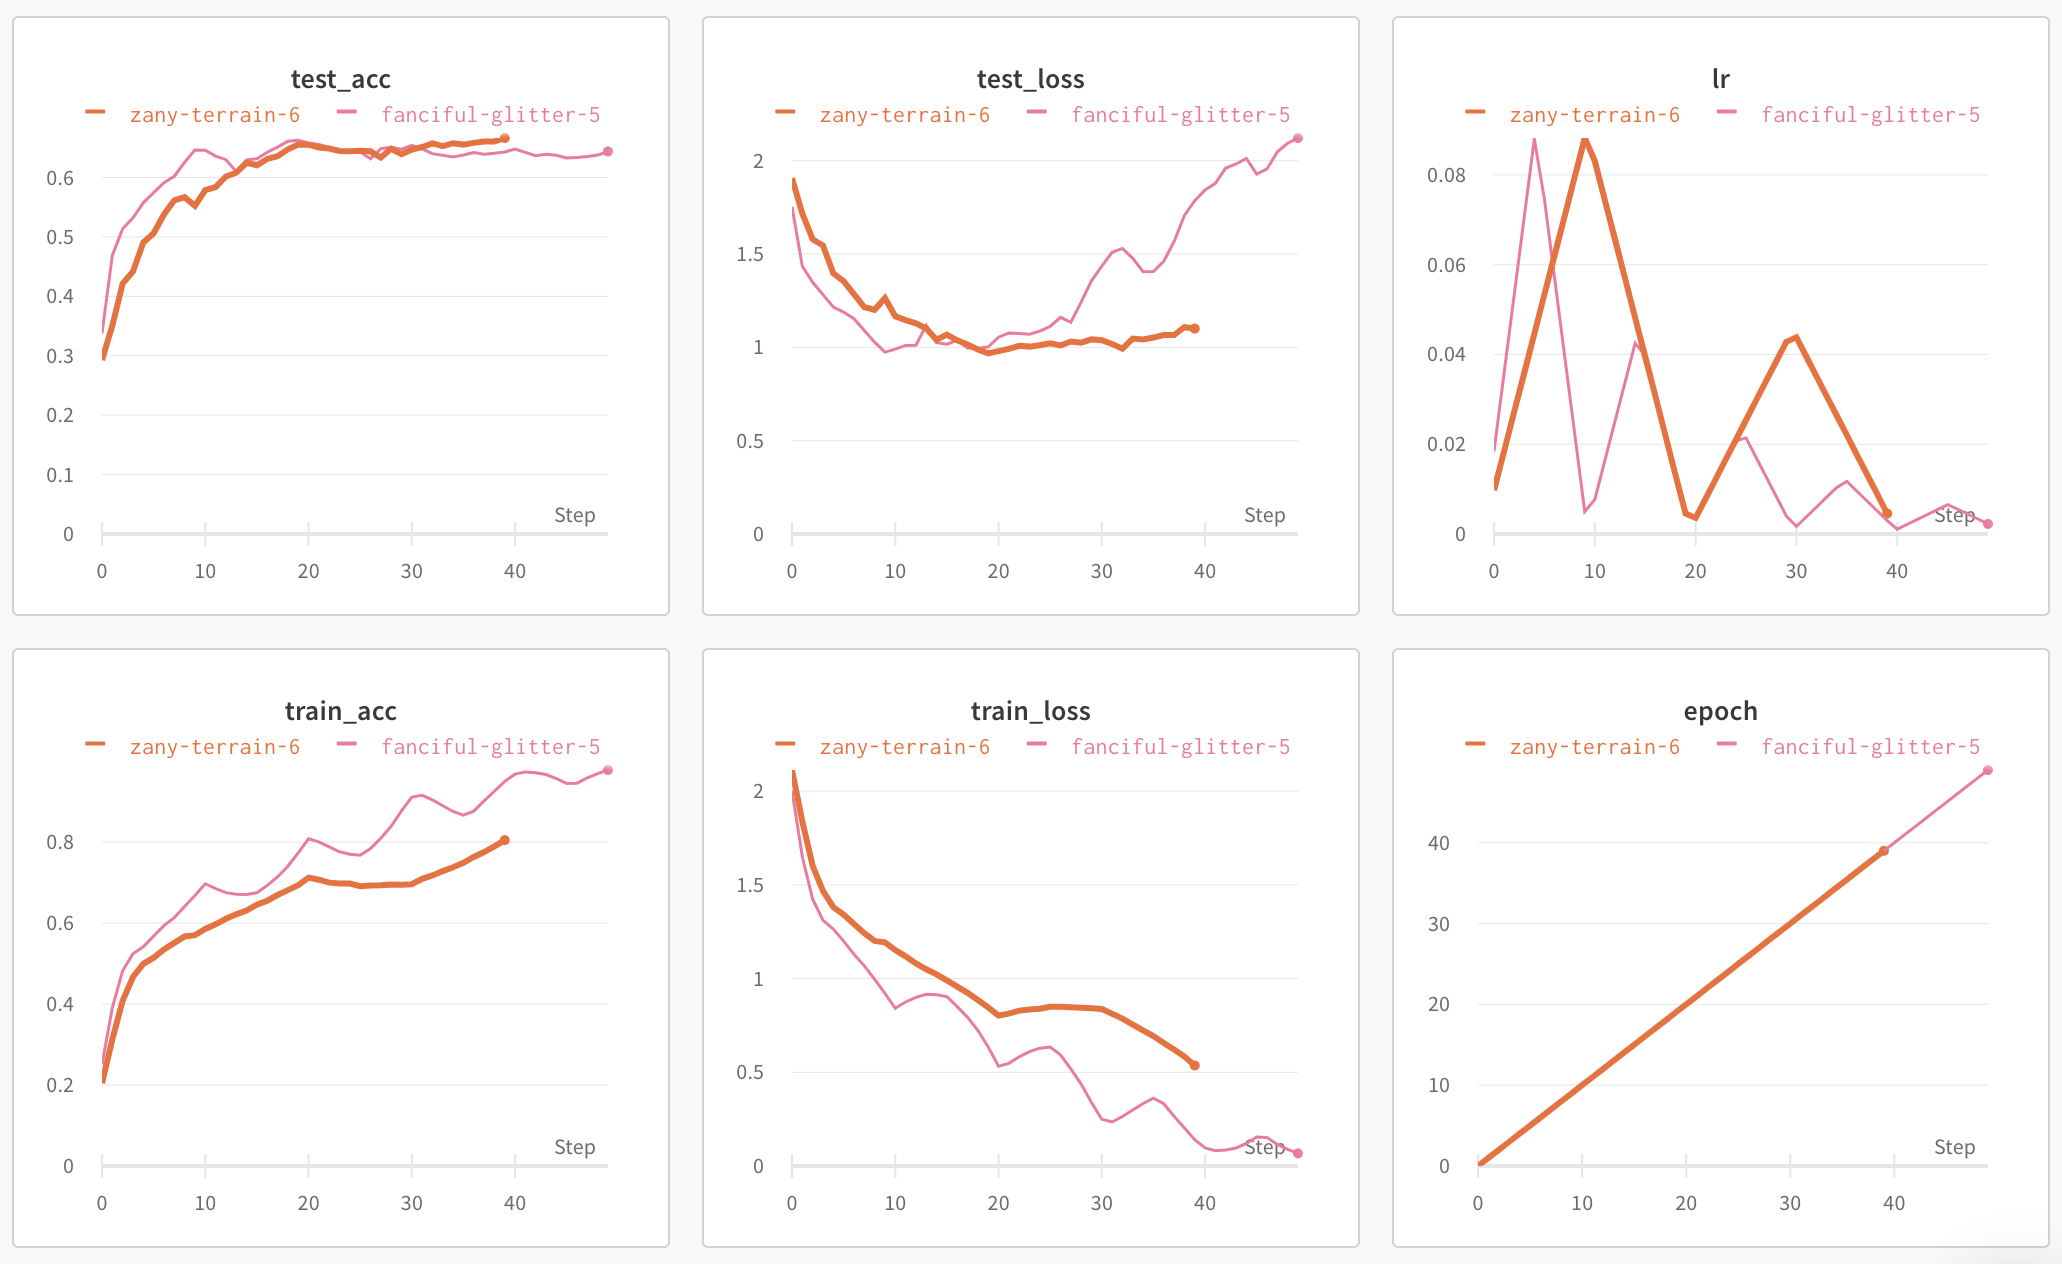

In [34]:
IPython.display.Image(filename='ViT_CIFAR10_WandB_dashboard.png') #, width=100, height=100)